Accuracy:  0.9264705882352942 

Recall Score:  0.8571428571428571 

Precision Score:  0.96 

F1 Score:  0.9056603773584904 

Confustion matrix:
 [[39  1]
 [ 4 24]] 



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

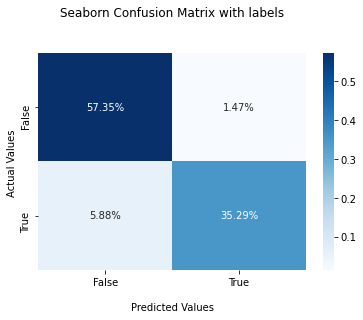

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

dataset = pd.read_csv('trainingDataset1week.csv')
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has on/off
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model1 = DecisionTreeClassifier()
    # model2 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
    # model2.fit(X, y)

prediction1 = model1.predict(X_test)
    # predictions2 = model2.predict([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23]])

score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

recallScore = recall_score(y_test, prediction1)
print ("Recall Score: ", recallScore,"\n")

precisionScore = precision_score(y_test, prediction1)
print ("Precision Score: ", precisionScore,"\n")

f1score = f1_score(y_test, prediction1)
print ("F1 Score: ", f1score,"\n")

cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")


ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Accuracy:  0.8088235294117647 

Recall Score:  0.8088235294117647 

Precision Score:  0.8616545893719807 

F1 Score:  0.8063565643648765 

Confustion matrix:
 [[14  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  1  0 21  0  0  0]
 [ 0  0  3  2  5  1  0]
 [ 2  0  1  0  0  9  1]
 [ 2  0  0  0  0  0  3]] 



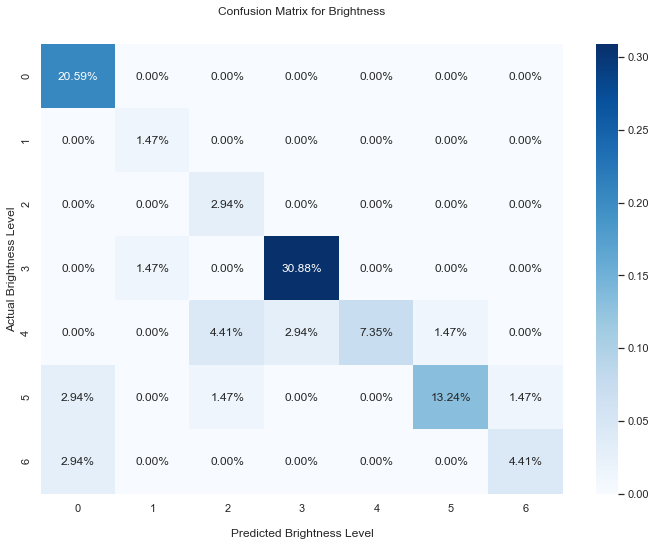

In [4]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Color temp (x*1000)Kelvin']) #only has brightness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)


score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Brightness\n\n');
ax.set_xlabel('\nPredicted Brightness Level')
ax.set_ylabel('Actual Brightness Level');

Accuracy:  0.7205882352941176 

Recall Score:  0.7205882352941176 

Precision Score:  0.7632279227480465 

F1 Score:  0.7322883899549124 

Confustion matrix:
 [[ 6  0  0  0  0  0  0]
 [ 1 18  1  0  0  1  0]
 [ 0  0  2  0  3  0  0]
 [ 0  0  2  5  2  1  0]
 [ 1  0  1  2  1  0  0]
 [ 0  1  1  0  0  2  0]
 [ 2  0  0  0  0  0 15]] 



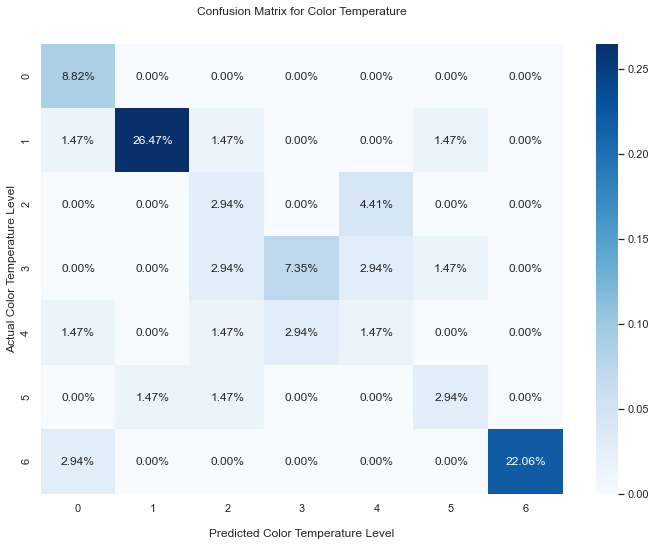

In [6]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Brightness (x*10)%']) #only has color temperature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)


score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Color Temperature\n\n');
ax.set_xlabel('\nPredicted Color Temperature Level')
ax.set_ylabel('Actual Color Temperature Level');